Saving data.csv to data.csv
📘 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       270
           1       0.89      0.93      0.91       668

    accuracy                           0.87       938
   macro avg       0.85      0.83      0.84       938
weighted avg       0.87      0.87      0.87       938

📗 Regression MSE: 2672.5766449854473
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - classification_accuracy: 0.6872 - classification_loss: 296.5136 - loss: 17473.4551 - regression_loss: 17176.2344 - regression_mae: 93.3314 - val_classification_accuracy: 0.7227 - val_classification_loss: 8.3937 - val_loss: 5554.9800 - val_regression_loss: 5502.9097 - val_regression_mae: 62.1439
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - classification_accuracy: 0.5885 - classification_loss: 4.8802 - loss: 11170.3652 - regression_loss: 11165.1104 - regression_mae: 75.5599 - val_classification_accuracy: 0.7227 - val_

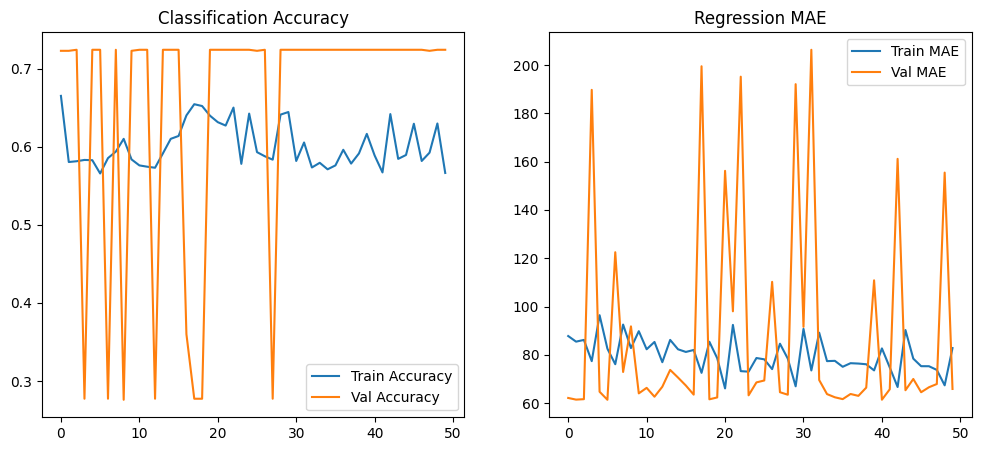

✅ DNN model saved as irrigation_dnn_model.h5


In [ ]:
# 📦 Step 1: Install dependencies (if needed)
!pip install scikit-learn tensorflow --quiet

# 📂 Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 📥 Step 3: Upload your dataset
from google.colab import files
uploaded = files.upload()

# 📄 Step 4: Load and clean data
df = pd.read_csv("/content/data.csv")
df = df.rename(columns={"soilmiosture": "soil_moisture"})

# Clean 'altitude' column
df["altitude"] = df["altitude"].str.replace(r"[^\d.]+", "", regex=True)
df["altitude"] = pd.to_numeric(df["altitude"], errors="coerce")

# Drop unnecessary columns
df.drop(columns=["id", "note", "date", "time", "class"], inplace=True)
df.dropna(inplace=True)

# 📊 Step 5: Split features and targets
X = df[["temperature", "pressure", "altitude"]]
y_class = df["status"]
y_reg = df["soil_moisture"]

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

# ✅ Step 6: Train Classification Model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_class_train)
y_class_pred = clf.predict(X_test)
print("📘 Classification Report:\n", classification_report(y_class_test, y_class_pred))

# ✅ Step 7: Train Regression Model (Random Forest)
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_reg_train)
y_reg_pred = reg.predict(X_test)
print("📗 Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

# 🧠 Step 8: Build DNN (Multi-output)
input_layer = Input(shape=(3,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)

# Output 1: Classification
output_class = Dense(1, activation='sigmoid', name='classification')(x)

# Output 2: Regression
output_reg = Dense(1, name='regression')(x)

# Model
dnn_model = Model(inputs=input_layer, outputs=[output_class, output_reg])
dnn_model.compile(
    optimizer=Adam(0.001),
    loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
    metrics={'classification': 'accuracy', 'regression': 'mae'}
)

# 🏋️ Step 9: Train DNN
history = dnn_model.fit(
    X_train,
    {'classification': y_class_train, 'regression': y_reg_train},
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 📈 Step 10: Plot DNN training history
plt.figure(figsize=(12,5))

# Classification Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_classification_accuracy'], label='Val Accuracy')
plt.title("Classification Accuracy")
plt.legend()

# Regression MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['regression_mae'], label='Train MAE')
plt.plot(history.history['val_regression_mae'], label='Val MAE')
plt.title("Regression MAE")
plt.legend()

plt.show()

# 💾 Step 11: Save DNN model
dnn_model.save("irrigation_dnn_model.h5")
print("✅ DNN model saved as irrigation_dnn_model.h5")


In [ ]:
# Run in Colab
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(dnn_model)
tflite_model = converter.convert()

with open("irrigation_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model converted and saved as irrigation_model.tflite")

Saved artifact at '/tmp/tmp0th5k5_6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  134464857739664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857740048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857741776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857740624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857743888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857743312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857740240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464857742736: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model converted and saved as irrigation_model.tflite


Saving sensor_Crop_Dataset (1).csv to sensor_Crop_Dataset (1).csv
📘 Fertigation Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.01      0.01       660
           1       0.83      0.99      0.91      3340

    accuracy                           0.83      4000
   macro avg       0.50      0.50      0.46      4000
weighted avg       0.72      0.83      0.76      4000

📗 Fertigation Regression MSE: 1055.4921998907148
Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - classification_accuracy: 0.6126 - classification_loss: 2.2417 - loss: 1598.5767 - regression_loss: 1596.3348 - regression_mae: 32.2663 - val_classification_accuracy: 0.8206 - val_classification_loss: 0.8614 - val_loss: 1129.1731 - val_regression_loss: 1128.3118 - val_regression_mae: 27.6888
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - classification_accuracy: 0.7540 - classification_loss: 0.7167 - loss: 1130.8972 - regression_loss: 1130.1804 - regressio

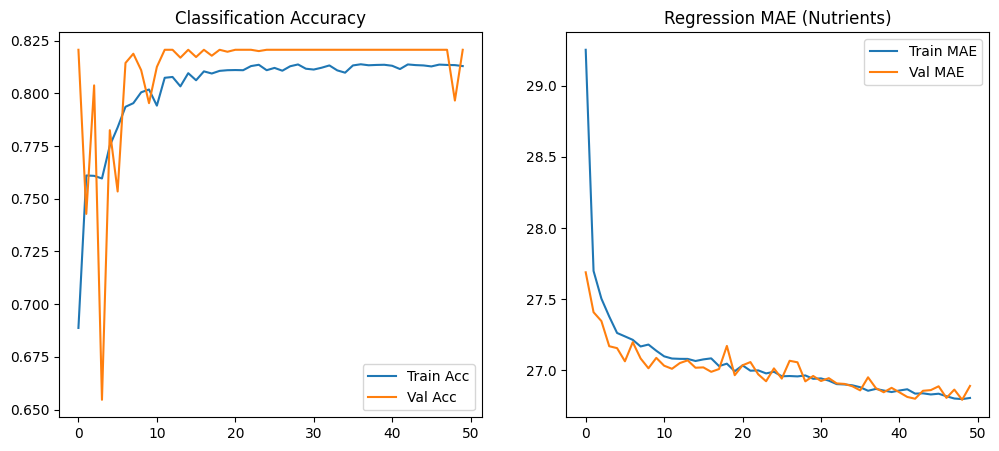

✅ Saved model as fertigation_dnn_model.h5


In [ ]:
# 📂 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 📥 Upload your dataset
from google.colab import files
uploaded = files.upload()

# 📄 Load and preview dataset
df = pd.read_csv("sensor_Crop_Dataset (1).csv")

# Simulate fertigation_status label (you can replace this with actual column)
df["fertigation_status"] = ((df["Nitrogen"] < 50) | (df["Phosphorus"] < 50) | (df["Potassium"] < 50)).astype(int)

# Select numerical features
features = ["Temperature", "Humidity", "pH_Value", "Rainfall"]
X = df[features]

# Targets
y_class = df["fertigation_status"]
y_reg = df[["Nitrogen", "Phosphorus", "Potassium"]]  # amount prediction

# Split data
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

# ✅ Train Classification Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_class_train)
y_class_pred = clf.predict(X_test)
print("📘 Fertigation Classification Report:\n", classification_report(y_class_test, y_class_pred))

# ✅ Train Regression Model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_reg_train)
y_reg_pred = reg.predict(X_test)
print("📗 Fertigation Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

# 🧠 Build DNN model
input_layer = Input(shape=(len(features),))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)

# Output 1: Classification
output_class = Dense(1, activation='sigmoid', name='classification')(x)

# Output 2: Regression for 3 nutrients
output_reg = Dense(3, name='regression')(x)

# Compile model
dnn_model = Model(inputs=input_layer, outputs=[output_class, output_reg])
dnn_model.compile(
    optimizer=Adam(0.001),
    loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
    metrics={'classification': 'accuracy', 'regression': 'mae'}
)

# 🏋️ Train DNN
history = dnn_model.fit(
    X_train,
    {'classification': y_class_train, 'regression': y_reg_train},
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 📈 Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_accuracy'], label='Train Acc')
plt.plot(history.history['val_classification_accuracy'], label='Val Acc')
plt.title("Classification Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['regression_mae'], label='Train MAE')
plt.plot(history.history['val_regression_mae'], label='Val MAE')
plt.title("Regression MAE (Nutrients)")
plt.legend()
plt.show()

# 💾 Save model
dnn_model.save("fertigation_dnn_model.h5")
print("✅ Saved model as fertigation_dnn_model.h5")


In [ ]:
# ✅ Step 4: Load the model without compilation (for conversion only)
model = tf.keras.models.load_model('/content/fertigation_dnn_model.h5', compile=False)

# ✅ Step 5: Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) Optimization to reduce size
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Perform the conversion
tflite_model = converter.convert()

# ✅ Step 6: Save the converted model to a file
with open('fertigation_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ Successfully converted to fertigation_model.tflite")

# ✅ Step 7: Download the file locally (if needed)
files.download('fertigation_model.tflite')

Saved artifact at '/tmp/tmpzewzmrgu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_1')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)]
Captures:
  134464785152528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464785150992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464785152144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464811089168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464811074192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464811086480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464811086096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134464811088784: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Successfully converted to fertigation_model.tflite


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>